# **PANDAS**

In this section, we introduce the basics of pandas and create a sample data frame

*   We import the pandas library using import `pandas as pd`
*   we create a sample dataframe `df` from dictionary `data` containing three columns : Name, Age, and City
* We display the first few rows of the DataFrame using `df.head()` to provide an overviiew of the data



In [ ]:
#import pandas and many libraries

import pandas as pd
import numpy as np


In [ ]:
## creating a sample dataframe using a dictionary ....

dataset = {
    'Name': ['Álice', 'Bob', 'Charlie', 'David', 'Eva' ],
    'Age' : [25,69,41,23,12],
    'City' : ['NY', 'Lagos', 'LA', 'Chicago', 'Bostom']

}

print (dataset)

{'Name': ['Álice', 'Bob', 'Charlie', 'David', 'Eva'], 'Age': [25, 69, 41, 23, 12], 'City': ['NY', 'Lagos', 'LA', 'Chicago', 'Bostom']}


In [ ]:
## convert dataset to dataframe

df = pd.DataFrame(dataset)

print (df)

      Name  Age     City
0    Álice   25       NY
1      Bob   69    Lagos
2  Charlie   41       LA
3    David   23  Chicago
4      Eva   12   Bostom


In [ ]:
# display the first few rows of the DataFrame

df.head()

,Name,Age,City
0,Álice,25,NY
1,Bob,69,Lagos
2,Charlie,41,LA
3,David,23,Chicago
4,Eva,12,Bostom


# **DATA EXPLORATION**

Here we perform EDA on the loaded data

* We check 4 the number of rows and columns in the DataFrame using `df.shape()`
*   we use `df.describe()` to generate basic statistics (e.g count, mean, min ,max) for numerical columns.
* we check for the data types of each column in the DataFrame using `df.dtypes and df.info()`
* we check for missing values in the DataFrame using `df.isnull().sum()`


In [ ]:
df.shape      #5rows 3  columns

(5, 3)

In [ ]:
# to get the statistical part of the numeric dataset

df.describe()

,Age
count,5.000000
mean,34.000000
std,22.135944
min,12.000000
25%,23.000000
50%,25.000000
75%,41.000000
max,69.000000


In [ ]:
#to remove the zeros

df.describe().astype(int)

,Age
count,5
mean,34
std,22
min,12
25%,23
50%,25
75%,41
max,69


In [ ]:
#transpose

df.describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Age,5,34,22,12,23,25,41,69


In [ ]:
#to see the details of the columns in float

df.describe(include = object)

,Name,City
count,5,5
unique,5,5
top,Álice,NY
freq,1,1


In [ ]:
#to see the details of all columns in

df.describe(include = (int,object))

,Name,Age,City
count,5,5.000000,5
unique,5,NaN,5
top,Álice,NaN,NY
freq,1,NaN,1
mean,NaN,34.000000,NaN
std,NaN,22.135944,NaN
min,NaN,12.000000,NaN
25%,NaN,23.000000,NaN
50%,NaN,25.000000,NaN
75%,NaN,41.000000,NaN


In [ ]:
## TO Transpose

df.describe(include = (int,object)).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5,5,Álice,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5.0,NaN,NaN,NaN,34.0,22.135944,12.0,23.0,25.0,41.0,69.0
City,5,5,NY,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get the type of each column in dataset
# .astype is used to change the datatype of a series

df.dtypes

Name    object
Age      int64
City    object
dtype: object

In [ ]:
#.info gives us the description of the dataset
#.info helps to check if there is null
# non - null means thyere is no null value


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [ ]:
#how to find the missing values in a dataset
#we use .null to find the missing values
print (df.isnull().sum())



Name    0
Age     0
City    0
dtype: int64


In [ ]:
#isna is the same thing as .isnull

df.isna().sum()

Name    0
Age     0
City    0
dtype: int64

# **DATA CLEANING**

This section covers data cleaning operations:

*   We rename the city column location using df.rename
*   We chaange the data type of the Age column to float



In [ ]:
#list of all the columns

df.columns

Index(['Name', 'Age', 'City'], dtype='object')

In [ ]:
#rename columns

df_renamed_column = df.rename(columns = {'City': 'location'})

print (df_renamed_column)

      Name  Age location
0    Álice   25       NY
1      Bob   69    Lagos
2  Charlie   41       LA
3    David   23  Chicago
4      Eva   12   Bostom


In [ ]:
#OR
# We can asalo change a column name by using a dictionary
# The column u want to change will be the key
# what you want to replace it it with will be put as a value
# column = {'new column name': 'old column name '}
# df is still maintaining it old name (it returning a new DataFrame)


df.rename(columns = {'City':'location', 'Age' : 'age'})       ## df will still be the same because we didnt add the inplace function

,Name,age,location
0,Álice,25,NY
1,Bob,69,Lagos
2,Charlie,41,LA
3,David,23,Chicago
4,Eva,12,Bostom


In [ ]:
# inplace = True .... is when we dont want to reassign our DataFrame to another variable

df.rename(columns = {'City':'location', 'Age' : 'age'}, inplace = True)


In [ ]:
df

,Name,age,location
0,Álice,25,NY
1,Bob,69,Lagos
2,Charlie,41,LA
3,David,23,Chicago
4,Eva,12,Bostom


# **DATA TRANSFORMATION AND FILTERING**

*  Here we create a new column 'ahe category' using np.where() to categorize ages into young, adult or senior based on specified beings




In [ ]:
#create a new column
#there are many ways to create a new column

df ['Age category'] = np.where(df ['age'] < 30, 'Young', 'Adult')

In [ ]:
df

,Name,age,location,Age category
0,Álice,25,NY,Young
1,Bob,69,Lagos,Adult
2,Charlie,41,LA,Adult
3,David,23,Chicago,Young
4,Eva,12,Bostom,Young


In [ ]:
# we can create a subset of the dataframe

df [['Name', 'location']]

,Name,location
0,Álice,NY
1,Bob,Lagos
2,Charlie,LA
3,David,Chicago
4,Eva,Bostom


In [ ]:
df [['Name']]

,Name
0,Álice
1,Bob
2,Charlie
3,David
4,Eva


In [ ]:
## we can filter our dataset based on a given condition using a row
# we want to filter it using a row

young_people = df [df ['age'] < 30]        #we can turn it to a adatframe

print (young_people)      #young_people is now a dataframe

    Name  age location Age category
0  Álice   25       NY        Young
3  David   23  Chicago        Young
4    Eva   12   Bostom        Young


# **DATA SELECTION**

This section demostrates how to filter and select data based on specific criteria



In [ ]:
# select rows with age category adult

df [df ['Age category'] == 'Adult']

,Name,age,location,Age category
1,Bob,69,Lagos,Adult
2,Charlie,41,LA,Adult


In [ ]:
# select rows with age category adult

df [df ['Age category'] == 'Young']

,Name,age,location,Age category
0,Álice,25,NY,Young
3,David,23,Chicago,Young
4,Eva,12,Bostom,Young


In [ ]:
# select a single column

with_header = df [['Name']]           #the diff is the double square bracket

without_header = df ['Name']         #one square bracket

print(with_header)
print ()
print(without_header)


      Name
0    Álice
1      Bob
2  Charlie
3    David
4      Eva

0      Álice
1        Bob
2    Charlie
3      David
4        Eva
Name: Name, dtype: object


# **DATA GROUPING AND AGGREGATION**

In this section, we would group data based on a column and perform aggregation


  * we would use `data.groupby`
 * we use groupby to carry out calculations

In [ ]:
# groupby age category and calculate mean age

df.groupby ('Age category')['age'].mean()

Age category
Adult    55.0
Young    20.0
Name: age, dtype: float64

In [ ]:
#groupby is majorly used for calculation

df.groupby ('Age category')['age'].sum()

Age category
Adult    110
Young     60
Name: age, dtype: int64

In [ ]:
#groupby age category and calculate mean age

new_age = round(df.groupby ('Age category')['age'].mean(),0)

print (new_age)

Age category
Adult    55.0
Young    20.0
Name: age, dtype: float64


In [ ]:
#groupby age category and calculate mean age
#to make it a int

new_age1 = np.ceil(df.groupby ('Age category')['age'].mean()).astype(int)

print (new_age1)


Age category
Adult    55
Young    20
Name: age, dtype: int64


In [ ]:
df.Age.mean()

34.0

In [ ]:
df.groupby ('Age category')['age'].mean()

# **DATA VISUALIZATION WITH PANDAS**

This section introduces basic data visualization using pandas and matplotLib and Seaborn

  * we create a histogran of ages using histplot (*data = df, x = 'age')
  * we set plot titles and labels using plt.title
  * we display the plot using plt.show

In [ ]:
#we use 2 libraries

import matplotlib.pyplot as plt
import seaborn as sns

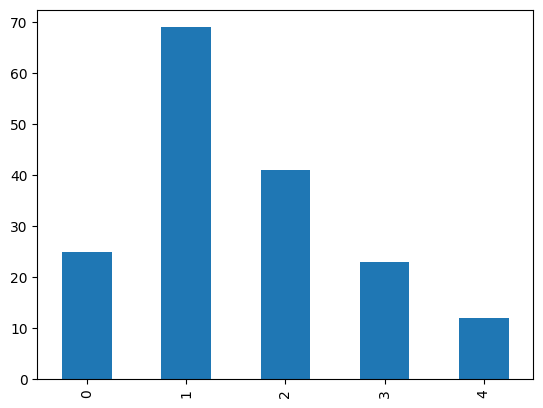

In [ ]:
#to plot a column chat

df ['age'].plot(kind = 'bar')

plt.show()   #we use plt.show to revove all the writeup

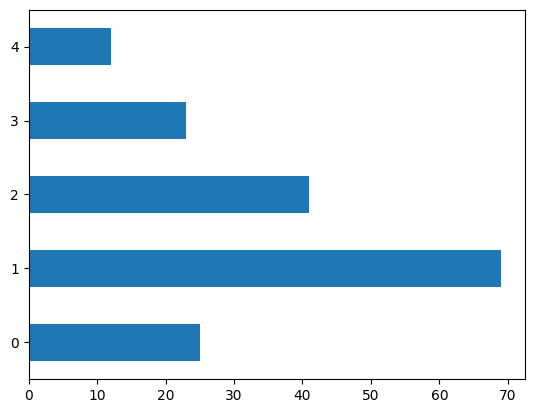

In [ ]:
#to plot a bar chat

df ['age'].plot(kind = 'barh')

plt.show()   #we use plt.show to revove all the writeup

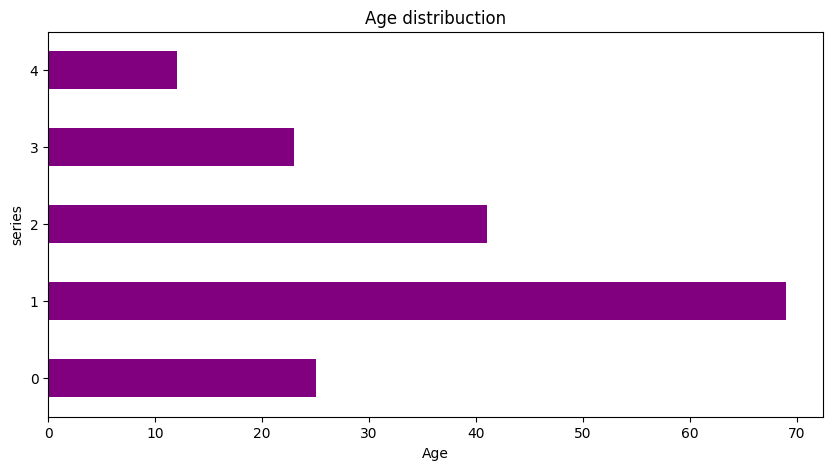

In [ ]:
#to plot a bar chat

plt.figure(figsize = (10,5))       # to reduce the size
df ['age'].plot(kind = 'barh', color = 'purple')
plt.title ('Age distribuction')
plt.xlabel('Age')
plt.ylabel('series')

plt.show()   #we use plt.show to revove all the writeup

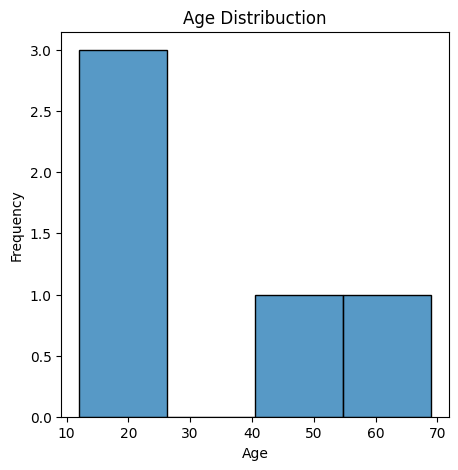

In [ ]:
# plot the age distribuction

plt.figure (figsize = (5,5))
sns.histplot (data = df, x = 'age')

plt.title ('Age Distribuction')
plt.xlabel ('Age')
plt.ylabel ('Frequency')

plt.show()    #we use plt.show to revove all the writeup

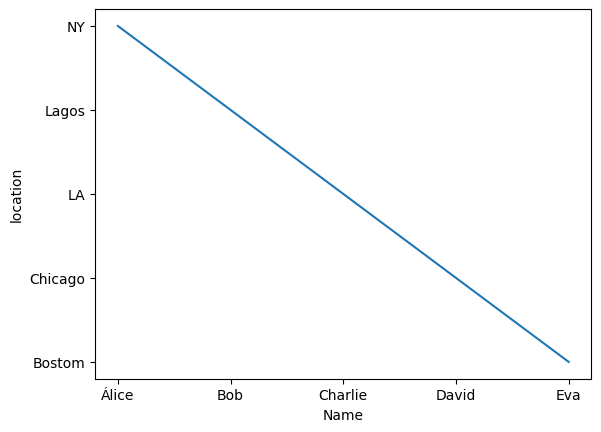

In [ ]:
#LINE chart with seaborn

sns.lineplot(data = df, y = 'location', x = 'Name')
plt.show()

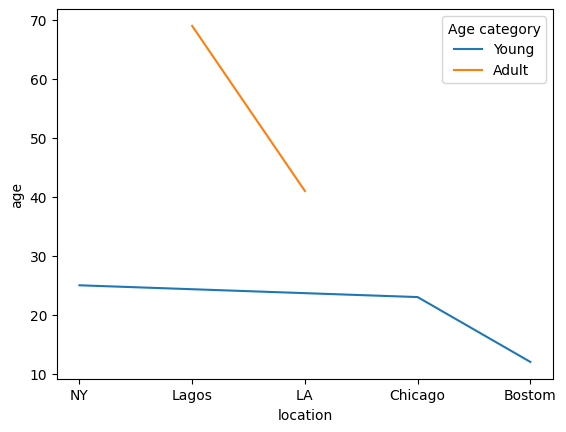

In [ ]:
sns.lineplot(data = df, y = 'age', x = 'location', hue = 'Age category')
plt.show()

# **DATA EXPORT**


* Finally, we save the cleaned and processed data to a new CSV file
* we use `data.to_csv` to save a file





In [ ]:
## save the data to a csv file

df.to_csv ('/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv', index = False)       # index = False means it would drop the index column